In [69]:
import cv2
import numpy as np
import os
import pylab as pl
from sklearn.metrics import confusion_matrix, accuracy_score #sreeni
import joblib

In [70]:
# Load the classifier, class names, scaler, number of clusters and vocabulary 
#from stored pickle file (generated during training)
clf, classes_names, stdSlr, k, voc = joblib.load("bovw.pkl")

In [71]:
# Get the path of the testing image(s) and store them in a list
#test_path = 'dataset/test' # Names are Aeroplane, Bicycle, Car
test_path = "C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/val"  # Folder Names are Parasitized and Uninfected
#instead of test if you use train then we get great accuracy

testing_names = os.listdir(test_path)

In [72]:
testing_names

['Amoeba',
 'Euglena',
 'Hydra',
 'Paramecium',
 'Rod_bacteria',
 'Spherical_bacteria',
 'Spiral_bacteria',
 'Yeast']

In [73]:
# Get path to all images and save them in a list
# image_paths and the corresponding label in image_paths
image_paths = []
image_classes = []
class_id = 0

#To make it easy to list all file names in a directory let us define a function
#
def imglist(path):
    return [os.path.join(path, f) for f in os.listdir(path)]

In [74]:
#Fill the placeholder empty lists with image path, classes, and add class ID number

for testing_name in testing_names:
    dir = os.path.join(test_path, testing_name)
    class_path = imglist(dir)
    image_paths+=class_path
    image_classes+=[class_id]*len(class_path)
    class_id+=1

In [75]:
# Create feature extraction and keypoint detector objects
    #SIFT is not available anymore in openCV    
# Create List where all the descriptors will be stored
des_list = []

#BRISK is a good replacement to SIFT. ORB also works but didn;t work well for this example
brisk = cv2.BRISK_create(30)

for image_path in image_paths:
    im = cv2.imread(image_path)
    kpts, des = brisk.detectAndCompute(im, None)
    des_list.append((image_path, des))

In [76]:
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]
for descriptor in des_list[0:]:
    if str(type(descriptor[1])) == "<class 'NoneType'>":
        print("nan type occures!!!")
        continue
    else:
        descriptors = np.vstack((descriptors, descriptor[1]))

nan type occures!!!


In [77]:
# Calculate the histogram of features
#vq Assigns codes from a code book to observations.
from scipy.cluster.vq import vq    
test_features = np.zeros((len(image_paths), k), "float32")
for i in range(len(image_paths)):
    if str(type(des_list[i][1])) == "<class 'NoneType'>":
        print("nan type occures!!!")
        continue
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        test_features[i][w] += 1

nan type occures!!!


In [78]:
# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (test_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')

In [79]:
# Scale the features
#Standardize features by removing the mean and scaling to unit variance
#Scaler (stdSlr comes from the pickled file we imported)
test_features = stdSlr.transform(test_features)

In [80]:
#######Until here most of the above code is similar to Train except for kmeans clustering####

#Report true class names so they can be compared with predicted classes
true_class =  [classes_names[i] for i in image_classes]
# Perform the predictions and report predicted class names. 
predictions =  [classes_names[i] for i in clf.predict(test_features)]


In [81]:
#Print the true class and Predictions 
print ("true_class ="  + str(true_class))
print ("prediction ="  + str(predictions))

true_class =['Amoeba', 'Amoeba', 'Amoeba', 'Amoeba', 'Amoeba', 'Amoeba', 'Amoeba', 'Amoeba', 'Amoeba', 'Amoeba', 'Amoeba', 'Amoeba', 'Amoeba', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Euglena', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Param

In [82]:
#To make it easy to understand the accuracy let us print the confusion matrix

def showconfusionmatrix(cm):
    pl.matshow(cm)
    pl.title('Confusion matrix')
    pl.colorbar()
    pl.show()


accuracy =  0.2857142857142857
[[ 1  5  0  2  3  0  0  2]
 [ 1 17  1  7  2  2  2  0]
 [ 1  4  6  1  1  1  1  0]
 [ 1  9  3  9  1  2  1  3]
 [ 0  4  0  3  1  3  3  0]
 [ 0  6  2  1  2  3  2  0]
 [ 0  8  3  0  2  0  1  0]
 [ 0 10  0  0  0  0  0  4]]


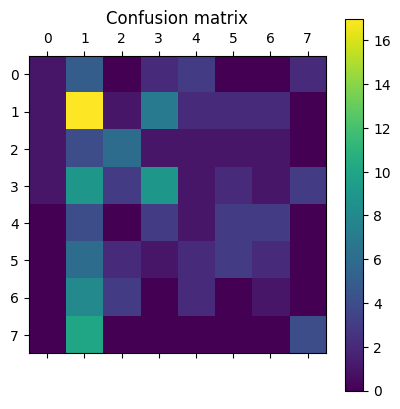

In [84]:
accuracy = accuracy_score(true_class, predictions)
print ("accuracy = ", accuracy)
cm = confusion_matrix(true_class, predictions)
print (cm)

showconfusionmatrix(cm)